In [1]:
from __future__ import print_function
from __future__ import division
import numpy as np
import scipy.stats as stats
import scipy.special as special
import pandas as pd
import chaospy as cp

%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

sns.set_style("ticks")#'whitegrid')#
#sns.set_context("talk")
sns.set_style({'axes.linewidth':0.5,
               'xtick.direction': u'in',
               'xtick.major.size': 1.,
               'xtick.minor.size': 0.5,
               'ytick.direction': u'in',               
               'ytick.major.size': 1.,
               'ytick.minor.size': 0.5})  


:0: FutureWarning: IPython widgets are experimental and may change in the future.


# 6) Multivariate pdf: with Rosemblat and couplas
## Only one output or quantity of interest (QoI)

ISHIGAMI FUNCTION

Description: $ y = \sin(x_1) + a\,\sin^2(x_2) + b\,x_3^4 \,\sin(x_1) $

Dimensions: 3 

The Ishigami function of Ishigami & Homma (1990) is used as an example for uncertainty and sensitivity analysis methods, because it exhibits strong nonlinearity and nonmonotonicity. It also has a peculiar dependence on x3, as described by Sobol' & Levitan (1999). 

The values of a and b used by Crestaux et al. (2007) and Marrel et al. (2009) are: a = 7 and b = 0.1. Sobol' & Levitan (1999) use a = 7 and b = 0.05. 


In [2]:
def ishigami(a,b,x1,x2,x3):
    term1 = np.sin(x1)
    term2 = a*(np.sin(x2))**2
    term3 = b*x3**4. * np.sin(x1)

    return term1 + term2 + term3

a = 7.
b = 0.8#0.1

In [3]:
dist_x1 = cp.Uniform(-np.pi,np.pi)
dist_x2 = cp.Uniform(-np.pi,np.pi)
dist_x3 = cp.Uniform(-np.pi,np.pi)

dist = cp.J(dist_x1,dist_x2,dist_x3)
dist_Q = cp.Joe(dist, theta=1.)#6.)
dist_R = cp.J(cp.Uniform(),cp.Uniform(),cp.Uniform())

### a) MC with Halton sampling

In [4]:
sample_inputs = dist_Q.sample(size=1000,rule='H')
sample_u = np.array([ishigami(a,b,*node) for node in sample_inputs.T])

E_u = np.mean(sample_u,axis=0)
Std_u = np.std(sample_u,axis=0)
Q05_u = np.percentile(sample_u,5,axis=0)
Q95_u = np.percentile(sample_u,95,axis=0)

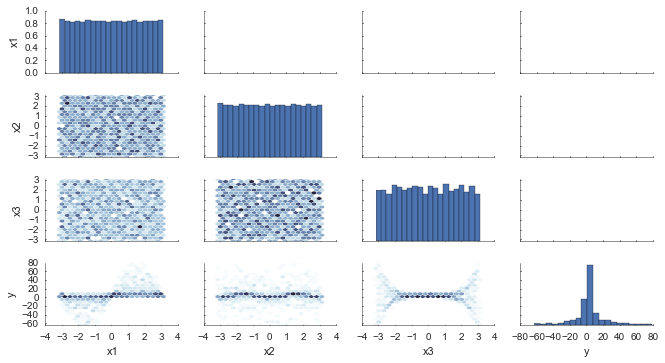

In [5]:
g=sns.PairGrid(pd.DataFrame(columns=['x1','x2','x3','y'],data=np.vstack([sample_inputs,sample_u]).T),
               size=1.3,aspect=1.8,diag_sharey=False)
#g.map_lower(plt.scatter,alpha=0.2)
g.map_lower(plt.hexbin, gridsize=20, color='white', cmap=sns.cubehelix_palette(light=1,rot=-.15, as_cmap=True))
g.map_diag(plt.hist,bins=20) 
g.savefig('Figures/6_Ishigami_MC_sample.pdf')

### b) PCE with Point collocation

In [6]:
M = 8    # Order of the polynomial
N = M + 1 # Number of terms

P = cp.orth_ttr(M,dist_R)

In [7]:
# Fixed number of model evaluations and Hammersley sequence sampling
nodes_R = dist_R.sample(100,rule='M')

# Exponenial rule and Hammersley sequence sampling
#nodes_R = dist_R.sample(2**M-1,rule='M')

# Linear rule and Hammersley sequence sampling
#nodes_R = dist_R.sample(2*M-1,rule='M')

print('nodes', len(nodes_R[0,:]))

nodes_Q = dist_Q.inv(dist_R.fwd(nodes_R))
sample_u_pc = np.array([ishigami(a,b,*node) for node in nodes_Q.T])

nodes 100


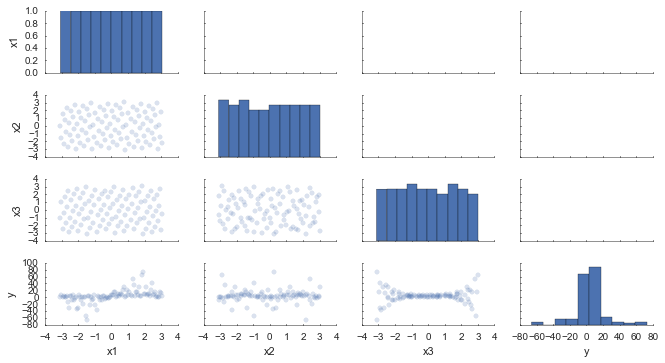

In [8]:
g=sns.PairGrid(pd.DataFrame(columns=['x1','x2','x3','y'],data=np.vstack([nodes_Q,sample_u_pc]).T),
               size=1.3,aspect=1.8,diag_sharey=False)
g.map_lower(plt.scatter,alpha=0.2)
#g.map_lower(plt.hexbin, gridsize=40, color='white', cmap=sns.cubehelix_palette(light=1,rot=-.15, as_cmap=True))
#g.map_upper(sns.kdeplot, cmap="Blues_d")
g.map_diag(plt.hist) 
g.savefig('Figures/6_Ishigami_PCE_nodes.pdf')

60
(1, 0, 0)
(2, 0, 0)
(3, 0, 0)
(4, 0, 0)
(5, 0, 0)
(6, 0, 0)
(1, 1, 0)
(2, 1, 0)
(3, 1, 0)
(4, 1, 0)
(0, 1, 0)
(0, 2, 0)
(1, 2, 0)
(2, 2, 0)
(3, 2, 0)
(1, 3, 0)
(2, 3, 0)
(0, 3, 0)
(0, 4, 0)
(0, 5, 0)
(0, 6, 0)
(1, 0, 1)
(2, 0, 1)
(3, 0, 1)
(4, 0, 1)
(0, 1, 1)
(1, 1, 1)
(2, 1, 1)
(3, 1, 1)
(4, 1, 1)
(0, 2, 1)
(1, 2, 1)
(1, 3, 1)
(2, 3, 1)
(0, 0, 1)
(2, 2, 1)
(0, 3, 1)
(0, 4, 1)
(1, 0, 2)
(2, 0, 2)
(3, 0, 2)
(0, 1, 2)
(1, 1, 2)
(0, 2, 2)
(0, 3, 2)
(0, 0, 2)
(1, 2, 2)
(0, 4, 2)
(1, 0, 3)
(2, 0, 3)
(0, 1, 3)
(1, 1, 3)
(0, 2, 3)
(0, 0, 3)
(1, 0, 4)
(0, 0, 4)
(0, 1, 4)
(0, 0, 5)
(0, 0, 0)
(0, 1, 5)


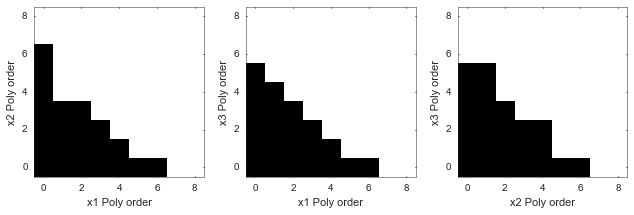

In [9]:
# Point collocation
u_hat = cp.fit_regression(P, nodes_R, sample_u_pc, 
                          #rule='LA',n_nonzero_coefs=20) #Lars (Least Angle Regression). n_nonzero_coefs= all dimensions
                          #rule='LAS',alpha=1e-4,max_iter=200) #Lasso (Least Absolute Shrinkage and Selection Operator) 
                          rule='LL', alpha=1e-4,max_iter=200) #Lasso and Lars model
                          #rule='OMP',n_nonzero_coefs=M+1, tol=1e2) # Orthogonal Matching Pursuit. n_nonzero_coefs=1D
                          # -----------
                          # NOT sparse
                          # -----------
                          #rule='BARD')

# Statistics based on the PCE coefficients
mean_u_pc, std_u_pc = cp.E(u_hat, dist_R), cp.Std(u_hat, dist_R)

print(len(u_hat.expons()))
for i in range(len(u_hat.expons())):
    print(u_hat.expons()[i]#, u_hat.coeffs()[i])

A=np.zeros([M+1,M+1,M+1])
for i in range(len(u_hat.expons())):
    A[u_hat.expons()[i]]=1.#u_hat.coeffs()[i]
    
fig = plt.figure(figsize=[9,3])

ax = fig.add_subplot(131)
plt.imshow(A[:,:,0].T, 
           interpolation='nearest',
           origin='lower'
          )
           #cmap=plt.cm.RdBu,
           #vmin=-np.max(u_hat.coeffs()),
           #vmax=np.max(u_hat.coeffs()))
ax.set_xlabel('x1 Poly order')
ax.set_ylabel('x2 Poly order')

ax = fig.add_subplot(132)
plt.imshow(A[:,0,:].T, 
           interpolation='nearest',
           origin='lower'
          )
           #cmap=plt.cm.RdBu,
           #vmin=-np.max(u_hat.coeffs()),
           #vmax=np.max(u_hat.coeffs()))
ax.set_xlabel('x1 Poly order')
ax.set_ylabel('x3 Poly order')

ax = fig.add_subplot(133)
plt.imshow(A[0,:,:].T, 
           interpolation='nearest',
           origin='lower'
          )
           #cmap=plt.cm.RdBu,
           #vmin=-np.max(u_hat.coeffs()),
           #vmax=np.max(u_hat.coeffs()))
ax.set_xlabel('x2 Poly order')
ax.set_ylabel('x3 Poly order')

fig.tight_layout()
fig.savefig('Figures/6_Ishigami_PCE_sparse.pdf')          

In [10]:
# Repeat the MC sample ussing the surrogate model
sample_R_inputs = dist_R.sample(size=1000,rule='H')
sample_Q_inputs = dist_Q.inv(dist_R.fwd(sample_R_inputs))
sample_u_hat = np.array([u_hat(*in_vars) for in_vars in sample_R_inputs.T ])

E_u_hat = np.mean(sample_u_hat,axis=0)
Std_u_hat = np.std(sample_u_hat,axis=0)
Q05_u_hat = np.percentile(sample_u_hat,5,axis=0)
Q95_u_hat = np.percentile(sample_u_hat,95,axis=0)

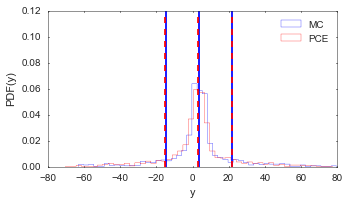

In [11]:
fig = plt.figure(figsize=[5,3])
ax = fig.add_subplot(111)
ax.hist(sample_u,
         bins=50,
         histtype='step',
         color='blue',
         normed=True,
         cumulative=False,
         label='MC'
        )
ax.vlines([E_u,E_u-Std_u,E_u+Std_u],0,0.12,'blue')
#plt.vlines([Q05_u,Q95_u],0,0.12,'lightblue')

plt.hist(sample_u_hat,
         bins=50,
         histtype='step',
         color='red',
         normed=True,
         cumulative=False,
         label='PCE'
        )
plt.vlines([mean_u_pc,mean_u_pc-std_u_pc,mean_u_pc+std_u_pc],0,0.12,'red','--')
#plt.vlines([Q05_u_hat,Q95_u_hat],0,0.12,'pink')

ax.set_xlabel('y')
ax.set_ylabel('PDF(y)')
ax.legend(loc='upper right')
fig.tight_layout()
fig.savefig('Figures/6_Ishigami_PCE_y.pdf')
print()

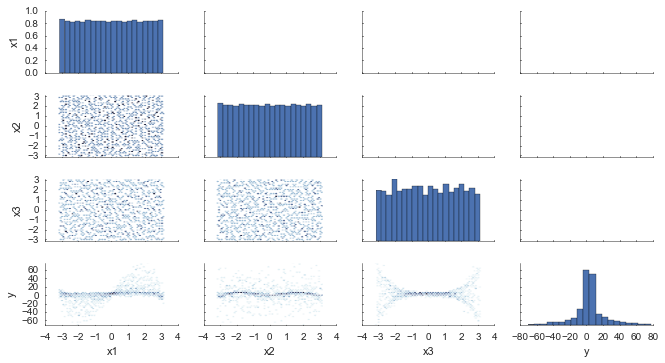

In [12]:
g=sns.PairGrid(pd.DataFrame(columns=['x1','x2','x3','y'],data=np.vstack([sample_Q_inputs,sample_u_hat]).T),
               size=1.3,aspect=1.8,diag_sharey=False)
#g.map_lower(plt.scatter,alpha=0.2)
g.map_lower(plt.hexbin, gridsize=40, color='white', cmap=sns.cubehelix_palette(light=1,rot=-.15, as_cmap=True))
#g.map_upper(sns.kdeplot, cmap="Blues_d")
g.map_diag(plt.hist,bins=20) 
g.savefig('Figures/6_Ishigami_PCE_sample.pdf')